In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pandas
%pip install numpy
%pip install nltk
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
data = pd.read_csv('Tweets.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
print("Dataset shape:", data.shape)
print("Columns:\n", data.columns)
print("\nSample rows:\n", data[['airline_sentiment', 'text']].head())

Dataset shape: (14640, 15)
Columns:
 Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Sample rows:
   airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


In [11]:
columns_to_keep = ['airline_sentiment', 'text']
df = data[columns_to_keep]

In [12]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


C:\Users\User\AppData\Local\Temp\ipykernel_9956\2896933324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


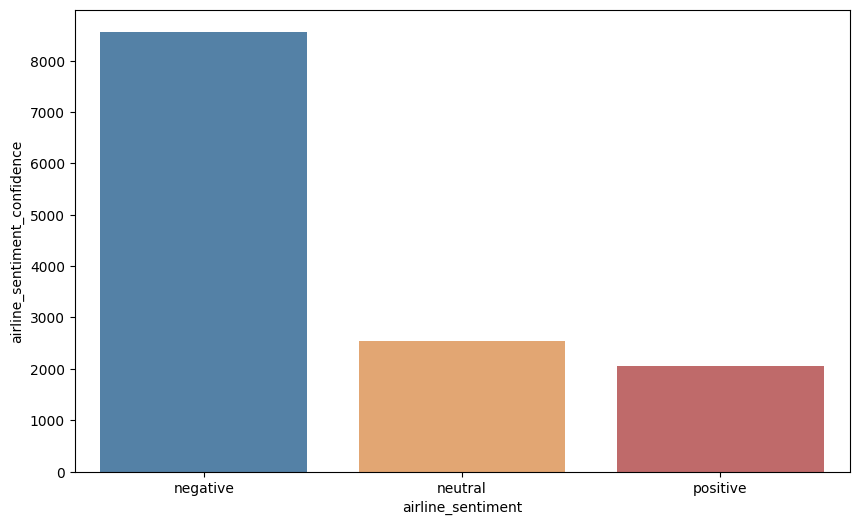

In [14]:
sentiment_summary = data.groupby('airline_sentiment')['airline_sentiment_confidence'].sum().reset_index()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='airline_sentiment',
    y='airline_sentiment_confidence',
    data=sentiment_summary,
    palette={'negative': '#4682B4', 'neutral': '#F4A460', 'positive': '#CD5C5C'}
)

In [15]:
#Observam ca avem mai multe negative

In [16]:
negative_df = data[data['airline_sentiment'] == 'negative']
negativereason_summary = negative_df['negativereason'].value_counts().reset_index()
negativereason_summary.columns = ['negativereason', 'count']

C:\Users\User\AppData\Local\Temp\ipykernel_9956\1062263837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


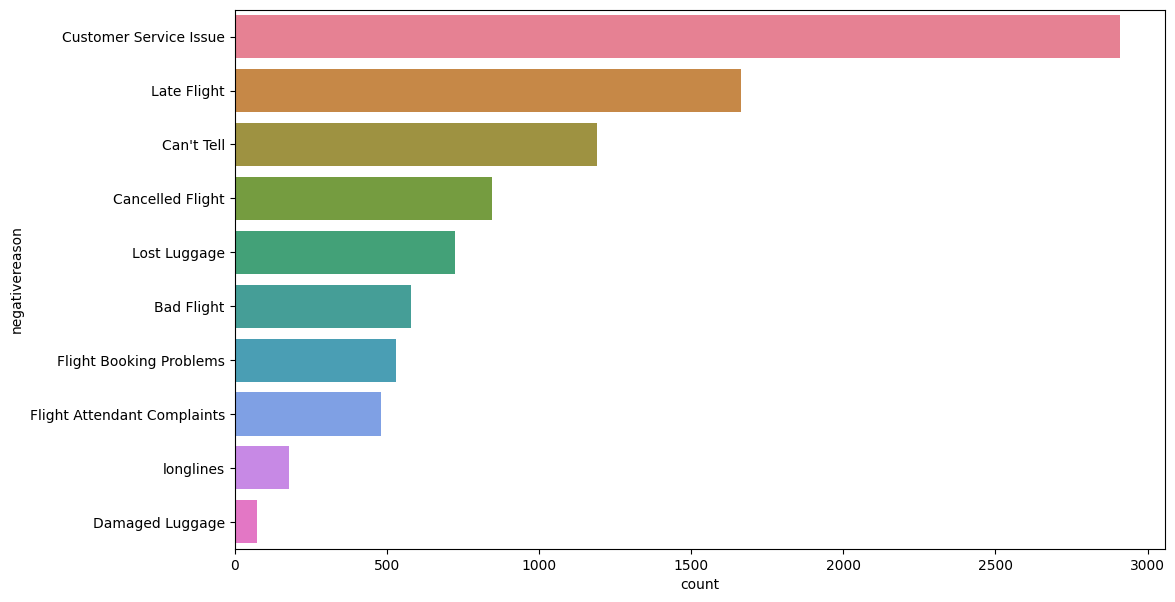

In [17]:
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    y='negativereason',
    x='count',
    data=negativereason_summary,
    palette='husl'  # Schimbă paleta dacă dorești alte culori
)

In [18]:
sentiment_airline = data.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')
print(sentiment_airline)


           airline airline_sentiment  count
0         American          negative   1960
1         American           neutral    463
2         American          positive    336
3            Delta          negative    955
4            Delta           neutral    723
5            Delta          positive    544
6        Southwest          negative   1186
7        Southwest           neutral    664
8        Southwest          positive    570
9       US Airways          negative   2263
10      US Airways           neutral    381
11      US Airways          positive    269
12          United          negative   2633
13          United           neutral    697
14          United          positive    492
15  Virgin America          negative    181
16  Virgin America           neutral    171
17  Virgin America          positive    152


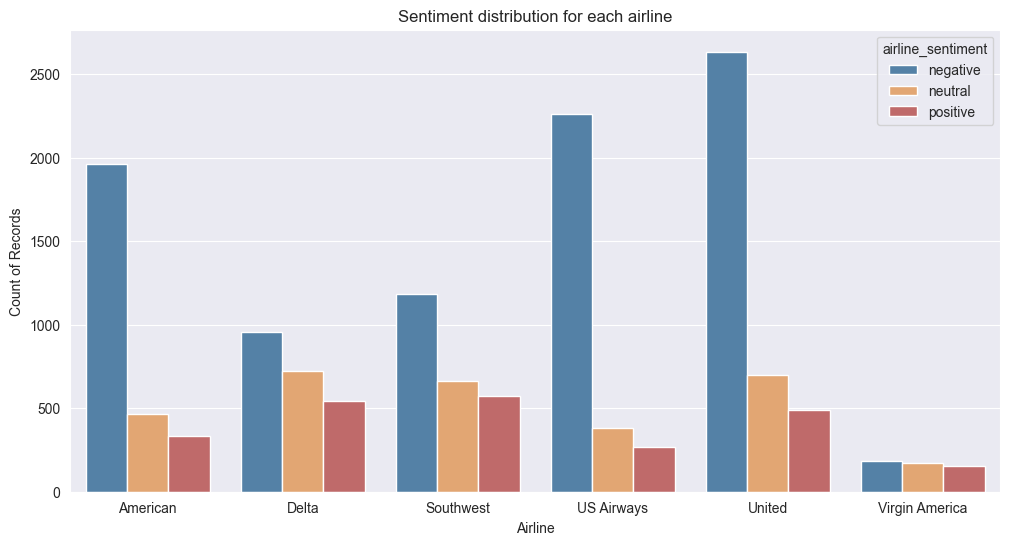

In [19]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Creează graficul bară
sns.barplot(
    data=sentiment_airline,
    x='airline', 
    y='count', 
    hue='airline_sentiment', 
    palette={'negative': '#4682B4', 'neutral': '#F4A460', 'positive': '#CD5C5C'}

)

# Adaugă titlu și etichete
plt.title('Sentiment distribution for each airline')
plt.xlabel('Airline')
plt.ylabel('Count of Records')

# Afișează graficul
plt.show()

In [27]:
y = data['airline_sentiment'].map({'positive': 12, 'neutral': 11, 'negative': 10})
y=data['negativereason'].map({'Customer Service Issue': 0, 'Late Flight': 1, "Can't Tell": 2, 'Cancelled Flight': 3, 'Lost Luggage': 4, 'Bad Flight': 5, 'Flight Booking Problems': 6, 'Flight Attendant Complaints': 7, 'longlines': 8, 'Damaged Luggage': 9})
y.value_counts()

airline_sentiment
10    9178
11    3099
12    2363
Name: count, dtype: int64

In [25]:
u = data['negativereason'].value_counts()
print(u)


negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


In [28]:
def map_sentiment_and_reason(row):
    if row['airline_sentiment'] == 'positive':
        return 12
    elif row['airline_sentiment'] == 'neutral':
        return 11
    elif row['airline_sentiment'] == 'negative':
        reason_mapping = {
            'Customer Service Issue': 0,
            'Late Flight': 1,
            "Can't Tell": 2,
            'Cancelled Flight': 3,
            'Lost Luggage': 4,
            'Bad Flight': 5,
            'Flight Booking Problems': 6,
            'Flight Attendant Complaints': 7,
            'longlines': 8,
            'Damaged Luggage': 9
        }
        return reason_mapping.get(row['negativereason'], 10)  # Default to 10 if no specific reason
    return None  # Handle missing cases

# Aplică funcția pe fiecare rând
y = data.apply(map_sentiment_and_reason, axis=1)

# Verifică distribuția valorilor
y.value_counts()


11    3099
0     2910
12    2363
1     1665
2     1190
3      847
4      724
5      580
6      529
7      481
8      178
9       74
Name: count, dtype: int64